<a href="https://colab.research.google.com/github/davidashirov/fast-ai-course/blob/main/MNIST_model_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

It's time to make an analysis for classic MNIST handwritten digits dataset.

In [11]:
#! [ -e /content ] && pip install -Uqq fastbook
#import fastbook
#fastbook.setup_book()
#from fastbook import *

from fastai.vision.all import *
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn.functional as F

In [12]:
# Import data from fast ai using untar_data
path = untar_data(URLs.MNIST)

In [97]:
train_x = torch.stack([tensor(Image.open(im_path))/255 for digit in range(10) for im_path in (path/'training'/str(digit)).ls().sorted()]).view((-1,28*28))
train_y = torch.tensor([digit for digit in range(10) for _ in (path/'training'/str(digit)).ls()])

valid_x = torch.stack([tensor(Image.open(im_path))/255 for digit in range(10) for im_path in (path/'testing'/str(digit)).ls().sorted()]).view((-1,28*28))
valid_y = torch.tensor([digit for digit in range(10) for _ in (path/'testing'/str(digit)).ls()])

#train_y = F.one_hot(train_y, -1).float()
#valid_y = F.one_hot(valid_y, -1).float()

print(f'{train_x.shape=}, {train_y.shape=}, {valid_x.shape=}, {valid_y.shape=}')

train_x.shape=torch.Size([60000, 784]), train_y.shape=torch.Size([60000]), valid_x.shape=torch.Size([10000, 784]), valid_y.shape=torch.Size([10000])


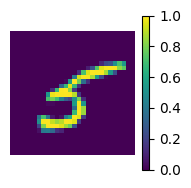

In [14]:
plt.figure(figsize=(2,2))
plt.imshow(valid_x[6000].view((28,28)))
plt.axis('off')
plt.colorbar()
plt.show()

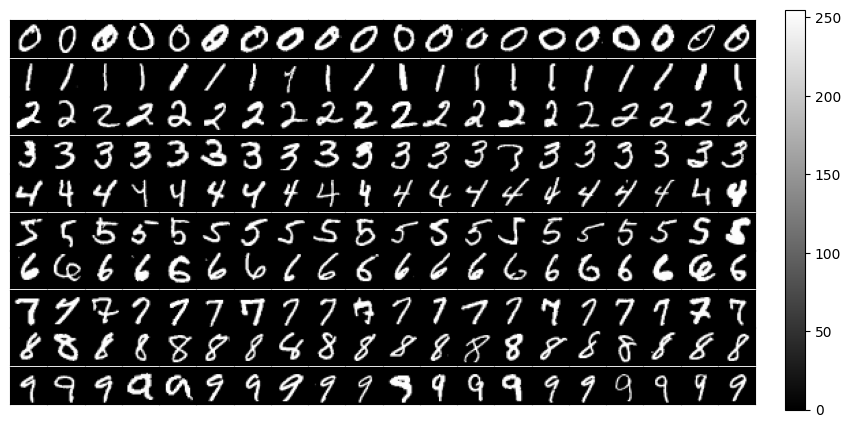

In [15]:
fig, axes = plt.subplots(ncols=20, nrows=10, sharex=False, sharey=True, figsize=(10, 5))
for digit in range(10):
  for i in range(20):
    im_paths = (path/'training'/str(digit)).ls().sorted()
    im = axes[digit, i].imshow(Image.open(im_paths[i]), cmap='gray')
    axes[digit, i].get_xaxis().set_visible(False)
    axes[digit, i].get_yaxis().set_visible(False)

cbar_ax = fig.add_axes([0.9, 0.10, 0.02, 0.8])
fig.colorbar(im, cax=cbar_ax)
plt.subplots_adjust(wspace=0, hspace=0, right=0.87)
plt.margins(0)
plt.show()

In [16]:
train_dset = list(zip(train_x, train_y))
valid_dset = list(zip(valid_x, valid_y))

(torch.Size([784]), tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

Define everything

In [62]:
# Initialize a single fully connected layer with a nonlinearity
def mse(y_pred, y_gt):
  out = torch.mean((y_pred - y_gt)**2).sqrt()
  return out

def softmax(x):
  x_exp = (x-x.mean(-1, keepdim=True)).exp()
  out = x_exp/x_exp.sum(dim=-1, keepdim=True)
  return out

def forward(x):
  out = softmax(x @ w + b)
  return out

# define hyperparams
n_epochs = 5
n_steps = 1000 #train_x.shape[0]/64//1
bs = 64 # batch size
lr = 100

# initialize params
torch.manual_seed(42)
w = torch.randn((train_x.shape[-1],train_y.shape[-1])).requires_grad_()
b = torch.randn(1).requires_grad_()
params = [w, b]

In [98]:
x,y = train_dset[torch.randint(0, 10000,(1,))]
x.shape,y


y_pred = x @ w + b
loss = F.cross_entropy(y_pred, y)

# zerograd and backward pass
for p in params:
  p.grad = None
loss.backward()

# make a step
for p in params:
  p = p - lr * p.grad

print(loss)

RuntimeError: ignored

In [96]:
y.shape

torch.Size([10])

In [10]:
# initialize params
torch.manual_seed(42)
w = torch.randn((train_x.shape[-1],train_y.shape[-1])).requires_grad_()
b = torch.randn(1).requires_grad_()
params = [w, b]

# lists for logging
losses = []
losses_valid = []

for step in range(n_steps):
  # Random sampling
  ixs = torch.randint(low=0, high=train_x.shape[0], size=(64,))
  x, y = train_x[ixs], train_y[ixs]

  # forward pass: out = y_pred
  y_pred = forward(x)

  # calc loss
  loss = mse(y_pred,y)

  # zerograd and backward pass
  for p in params:
    p.grad = None
  loss.backward()

  # make a step
  for p in params:
    p = p - lr * p.grad

  # logging
  if (step+1)%100==0:
    # forward through valid set
    with torch.no_grad():
      y_pred_valid = forward(valid_x)
      loss_valid = mse(y_pred_valid,valid_y)
    losses.append(loss.item())
    losses_valid.append(loss_valid.item())
    print(f'Step {step+1}/{n_steps}: {loss=}, {loss_valid=}')

Step 100/1000: loss=tensor(0.4197, grad_fn=<SqrtBackward0>), loss_valid=tensor(0.3993)
Step 200/1000: loss=tensor(0.3971, grad_fn=<SqrtBackward0>), loss_valid=tensor(0.3993)
Step 300/1000: loss=tensor(0.4027, grad_fn=<SqrtBackward0>), loss_valid=tensor(0.3993)
Step 400/1000: loss=tensor(0.4056, grad_fn=<SqrtBackward0>), loss_valid=tensor(0.3993)
Step 500/1000: loss=tensor(0.4006, grad_fn=<SqrtBackward0>), loss_valid=tensor(0.3993)
Step 600/1000: loss=tensor(0.4069, grad_fn=<SqrtBackward0>), loss_valid=tensor(0.3993)
Step 700/1000: loss=tensor(0.3944, grad_fn=<SqrtBackward0>), loss_valid=tensor(0.3993)
Step 800/1000: loss=tensor(0.4012, grad_fn=<SqrtBackward0>), loss_valid=tensor(0.3993)
Step 900/1000: loss=tensor(0.4163, grad_fn=<SqrtBackward0>), loss_valid=tensor(0.3993)
Step 1000/1000: loss=tensor(0.4033, grad_fn=<SqrtBackward0>), loss_valid=tensor(0.3993)
